In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import the financialmodelingprep API key
from config import financial_api_key

In [3]:
# Set the API base URL
#https://https://financialmodelingprep.com/api/v3/balance-sheet-statement/AAPL?period=quarter&limit=400&apikey=90e712c3062ebab6be06de188b5c6b0a
base_url = "https://financialmodelingprep.com/api/v3/balance-sheet-statement/"
#base_url = "https://financialmodelingprep.com/api/v3/financial-statement-full-as-reported/"
SYM = 'AAPL'
query_url = f"{base_url}{SYM}?period=quarter?apikey={financial_api_key}"
print(query_url)

#https://financialmodelingprep.com/api/v3/financial-statement-full-as-reported/ALK?apikey=90e712c3062ebab6be06de188b5c6b0a
#https://financialmodelingprep.com/api/v3/financial-statement-full-as-reported/AAPL?apikey=90e712c3062ebab6be06de188b5c6b0a
#API Data provided by Financial Modeling Prep https://financialmodelingprep.com/developer/docs/

https://financialmodelingprep.com/api/v3/balance-sheet-statement/AAPL?period=quarter?apikey=90e712c3062ebab6be06de188b5c6b0a


In [4]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
washington_corporations = pd.read_csv("Resources/publiccompaniesandsectors.csv")

# Display sample data
washington_corporations

,Company Name,SYM,Sector
0,Alder BioPharmaceuticals Inc.,ALDR,BioTech & Pharma
1,Alaska Air Group Inc.,ALK,Airlines
2,Amazon com Inc.,AMZN,Retail and Ecommerce
3,Anchor Bancorp,ANCB,Banks
4,Aptevo Therapeutics Inc.,APVO,BioTech & Pharma
...,...,...,...
68,Aval,AVLR,Taxes
69,Columbia Banking Inc.,COLB,Banks
70,eXp World Inc.,EXPI,Real Estate Services
71,Mr Cooper Group Inc.,COOP,Insurance


In [5]:
#identify tickers needed from washington corportions dataframe
ticker_list= washington_corporations["SYM"]
#ticker_list

#Create an empty list to collect data from API pull
financial_data = []

#loop through api to fetch data for all Washington Corproations
for count, symbol in enumerate(ticker_list):
    symbol = str(symbol)
    print(f'reading ticker {count} {symbol}')
    #if count > 10:
        #print("DEBUT BREAK!")
        #break
    if symbol == 'nan':
        continue
    query_url=f"{base_url}{symbol}?period=quarter&apikey={financial_api_key}"
    #print(f'symbol={symbol}, query={query_url}')
    
    financial_statement_data = requests.get(query_url).json()[0]
    
    #print(financial_statement_data[0])
    #print(financial_statement_data[1])
    
    ticker = financial_statement_data['symbol']
    date = financial_statement_data['date']
    fillingDate = financial_statement_data['fillingDate']
    calendarYear = financial_statement_data['calendarYear']
    period = financial_statement_data ['period']
    cashAndCashEquivalents = financial_statement_data['cashAndCashEquivalents']
    shortTermInvestments = financial_statement_data['shortTermInvestments']
    cashAndShortTermInvestments = financial_statement_data['cashAndShortTermInvestments']
    netReceivables= financial_statement_data['netReceivables']
    inventory =  financial_statement_data['inventory']
    otherCurrentAssets =financial_statement_data['otherCurrentAssets']
    totalCurrentAssets = financial_statement_data['totalCurrentAssets']
    propertyPlantEquipmentNet = financial_statement_data ['propertyPlantEquipmentNet']
    goodwillAndIntangibleAssets = financial_statement_data['goodwillAndIntangibleAssets']
    longTermInvestments = financial_statement_data['longTermInvestments']
    taxAssets = financial_statement_data['taxAssets']
    otherNonCurrentAssets = financial_statement_data['otherNonCurrentAssets']
    totalNonCurrentAssets = financial_statement_data['totalNonCurrentAssets']
    otherAssets = financial_statement_data['otherAssets']
    totalAssets = financial_statement_data['totalAssets']
    accountPayables = financial_statement_data['accountPayables']
    shortTermDebt = financial_statement_data['shortTermDebt']
    taxPayables = financial_statement_data['taxPayables']
    deferredRevenue = financial_statement_data['deferredRevenue']
    totalLiabilities = financial_statement_data['totalLiabilities']
    retainedEarnings = financial_statement_data ['retainedEarnings']
    accumulatedOtherComprehensiveIncomeLoss = financial_statement_data['accumulatedOtherComprehensiveIncomeLoss']
    totalEquity = financial_statement_data['totalEquity']
    totalLiabilitiesAndTotalEquity = financial_statement_data['totalLiabilitiesAndTotalEquity']
    totalInvestments = financial_statement_data['totalInvestments']
    totalDebt = financial_statement_data['totalDebt']
    netDebt = financial_statement_data['netDebt']
    
   #append to list
    financial_data.append({"Ticker":symbol,
                           "Date": date,
                           "Filing Date": fillingDate,
                           "Calendar Year": calendarYear,
                           "Period": period,
                           "Cash & Cash Equivalents": cashAndCashEquivalents,
                           "Net Receivables": netReceivables,
                           "Inventory": inventory,
                           "Other Current Assets": otherCurrentAssets,
                           "Total Current Assets": totalCurrentAssets,
                           "Property, Plant & Equip Net" : propertyPlantEquipmentNet,
                           "Goodwill & Intangible Assets": goodwillAndIntangibleAssets, 
                           "Long Term Investments": longTermInvestments, 
                           "Tax Assets": taxAssets, 
                           "Other NonCurrent Assets": otherNonCurrentAssets, 
                           "Total NonCurrent Assets": totalNonCurrentAssets, 
                           "Other Assets": otherAssets,
                           "Total Asstes": totalAssets, 
                           "Acct Payables": accountPayables,
                           "Short-term Debt": shortTermDebt,
                           "Tax Payables": taxPayables,
                           "Deferred Revenue": deferredRevenue, 
                           "Total Liabilities": totalLiabilities,
                           "Retained Earnings": retainedEarnings,
                           "Accumulated Other Comprehensive Income Loss": accumulatedOtherComprehensiveIncomeLoss,
                           "Total Equity": totalEquity,
                           "Total Liabilities": totalLiabilitiesAndTotalEquity,
                           "Total Investments": totalInvestments,
                           "Total Debt": totalDebt, 
                           "Net Debt": netDebt
                          })

                           
#covert the financial data into a dataframe
financial_data = pd.DataFrame.from_dict(financial_data)
financial_data
#financial_data.to_csv("Resources/stocktickerdata.csv")
    

reading ticker 0 ALDR
reading ticker 1 ALK
reading ticker 2 AMZN
reading ticker 3 ANCB
reading ticker 4 APVO
reading ticker 5 ATOS
reading ticker 6 AVA
reading ticker 7 BANR
reading ticker 8 BBSI
reading ticker 9 BCOR
reading ticker 10 BLFS
reading ticker 11 BSQR
reading ticker 12 CLIR
reading ticker 13 CLW
reading ticker 14 COST
reading ticker 15 CRAY
reading ticker 16 CTIC
reading ticker 17 DAIO
reading ticker 18 DATA
reading ticker 19 EMAN
reading ticker 20 nan
reading ticker 21 EXPD
reading ticker 22 EXPE
reading ticker 23 FFIV
reading ticker 24 FFNW
reading ticker 25 FNKO
reading ticker 26 FNWB
reading ticker 27 FSBW
reading ticker 28 FTV
reading ticker 29 HFWA
reading ticker 30 HMST
reading ticker 31 ISR
reading ticker 32 ITRI
reading ticker 33 JWN
reading ticker 34 KTCC
reading ticker 35 LASR
reading ticker 36 MCHX
reading ticker 37 MERC
reading ticker 38 nan
reading ticker 39 MSFT
reading ticker 40 MVIS
reading ticker 41 NLS
reading ticker 42 NSTG
reading ticker 43 NWPX
reading

,Ticker,Date,Filing Date,Calendar Year,Period,Cash & Cash Equivalents,Net Receivables,Inventory,Other Current Assets,Total Current Assets,...,Short-term Debt,Tax Payables,Deferred Revenue,Total Liabilities,Retained Earnings,Accumulated Other Comprehensive Income Loss,Total Equity,Total Investments,Total Debt,Net Debt
0,ALDR,2019-06-30,2019-08-06,2019,Q2,88378000,0,0,42361000,451672000,...,981000,0,0,462567000,-1140283000,-49000,110305000,320933000,5042000,-83336000
1,ALK,2022-09-30,2022-11-03,2022,Q3,688000000,345000000,94000000,221000000,3810000000,...,584000000,0,2535000000,14531000000,4278000000,-328000000,3826000000,0,3955000000,3267000000
2,AMZN,2022-12-31,2023-02-03,2022,Q4,53888000000,42360000000,34405000000,0,146791000000,...,0,0,13227000000,462675000000,83193000000,-4487000000,146043000000,0,140118000000,86230000000
3,ANCB,2018-09-30,2018-09-30,2019,Q1,50546000,1424000,0,0,0,...,0,0,0,478880000,48063000,-1232000,68676000,0,37000000,-13546000
4,APVO,2022-09-30,2022-11-10,2022,Q3,22150000,0,0,2468000,24618000,...,2000000,0,0,31695000,-201394000,0,15762000,0,10147000,-12003000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,AVLR,2022-06-30,2022-08-09,2022,Q2,1460594000,117412000,0,134830000,1712836000,...,12076000,4281000,307477000,2644468000,-791274000,-8386000,1026340000,0,1018725000,-441869000
66,COLB,2022-09-30,2022-10-28,2022,Q3,317675000,61652000,0,0,0,...,0,0,0,20405369000,804774000,-558844000,2115481000,11494352000,34632000,-283043000
67,EXPI,2022-09-30,2022-11-02,2022,Q3,134545000,119822000,0,65819000,320186000,...,202000,0,52652000,439698000,34616000,-1474000,255894000,0,922000,-133623000
68,COOP,2022-09-30,2022-10-26,2022,Q3,530000000,831000000,0,1729000000,3090000000,...,3070000000,0,0,12815000000,3801000000,0,4105000000,0,5743000000,5213000000


In [9]:
year_2022 = financial_data[(financial_data["Calendar Year"] == "2022")]
year_2021 = financial_data[(financial_data["Calendar Year"] == "2021")]
year_2020 = financial_data[(financial_data["Calendar Year"] == "2020")]
year_2019 = financial_data[(financial_data["Calendar Year"] == "2019")]
year_2018 = financial_data[(financial_data["Calendar Year"] == "2018")]
year_2022.head()

,Ticker,Date,Filing Date,Calendar Year,Period,Cash & Cash Equivalents,Net Receivables,Inventory,Other Current Assets,Total Current Assets,...,Short-term Debt,Tax Payables,Deferred Revenue,Total Liabilities,Retained Earnings,Accumulated Other Comprehensive Income Loss,Total Equity,Total Investments,Total Debt,Net Debt
1,ALK,2022-09-30,2022-11-03,2022,Q3,688000000,345000000,94000000,221000000,3810000000,...,584000000,0,2535000000,14531000000,4278000000,-328000000,3826000000,0,3955000000,3267000000
2,AMZN,2022-12-31,2023-02-03,2022,Q4,53888000000,42360000000,34405000000,0,146791000000,...,0,0,13227000000,462675000000,83193000000,-4487000000,146043000000,0,140118000000,86230000000
4,APVO,2022-09-30,2022-11-10,2022,Q3,22150000,0,0,2468000,24618000,...,2000000,0,0,31695000,-201394000,0,15762000,0,10147000,-12003000
5,ATOS,2022-09-30,2022-11-07,2022,Q3,117367000,610000,0,5418000,123395000,...,0,0,0,126724000,-148703000,-54000,123856000,0,0,-117367000
6,AVA,2022-09-30,2022-11-01,2022,Q3,14363000,188548000,123447000,137246000,463604000,...,281500000,40579000,0,7055799000,766624000,-10218000,2234849000,0,2724855000,2710492000


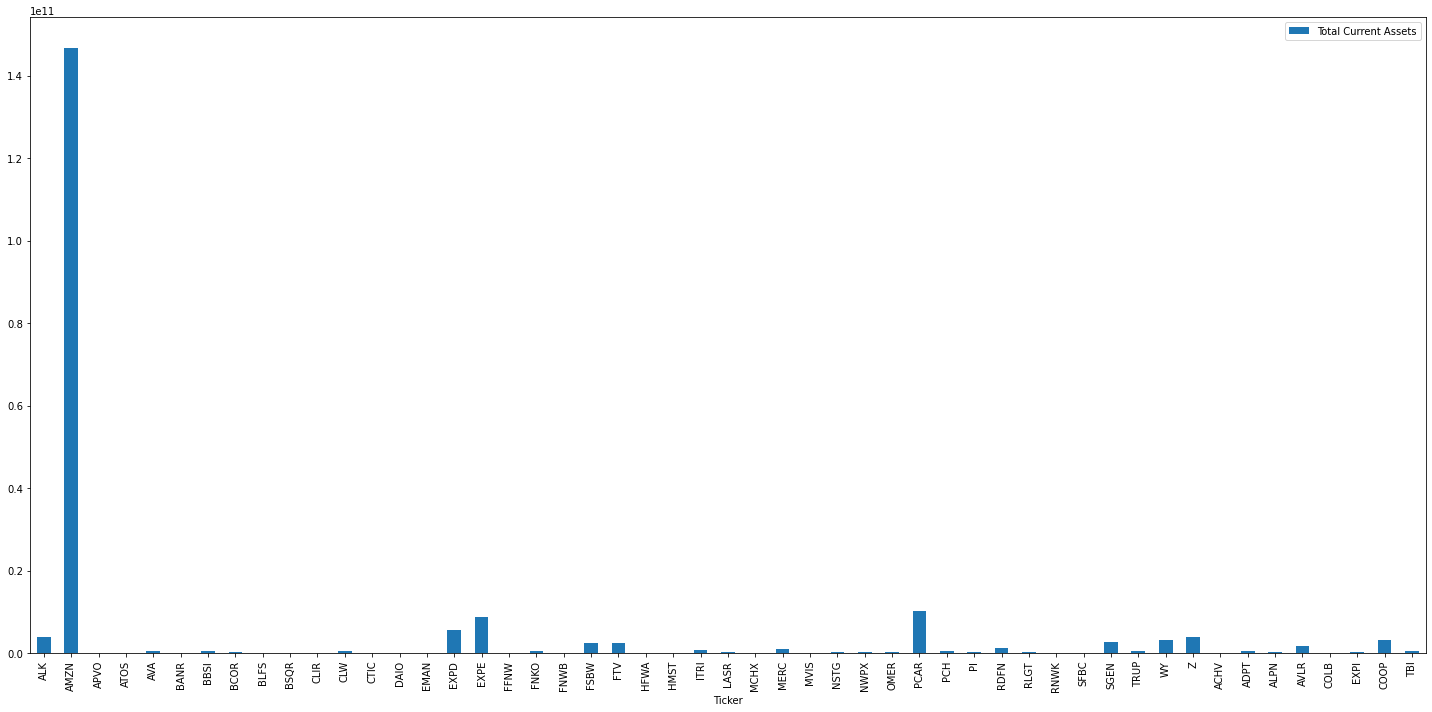

In [21]:
#show total current assets of each company in 2019
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
year_2022.plot(kind='bar', x='Ticker', y='Total Current Assets')


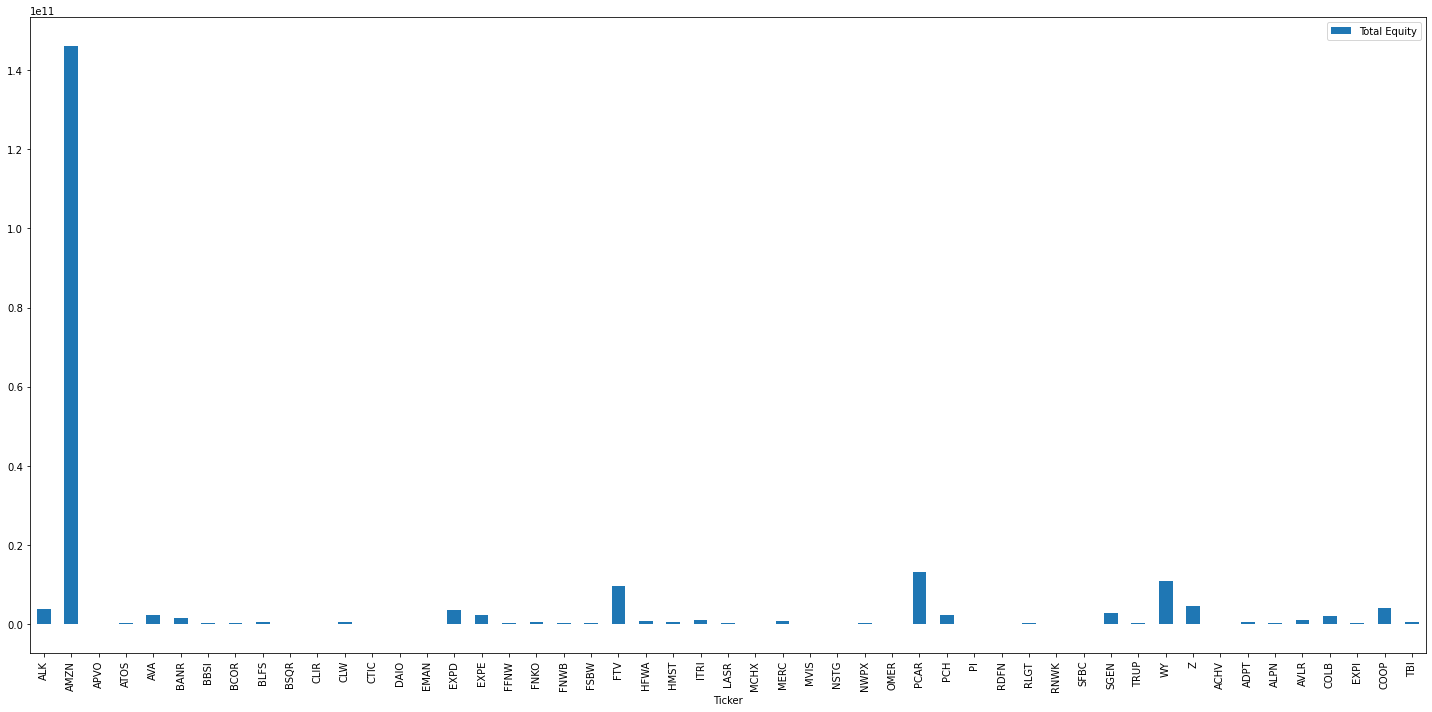

In [22]:
#total Equity of each company by year
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
year_2022.plot(kind='bar', x='Ticker', y='Total Equity')